In [37]:
import torch
import torch.nn as nn
from torch.optim import SGD


In [38]:
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [39]:
device = 'cuda'

In [40]:
X = torch.tensor(x).float().to(device=device)
Y = torch.tensor(y).float().to(device=device)

In [41]:
class MyNeuralNet(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.input_to_hidden1 = nn.Linear(2, 8)
        self.hidden1_activation = nn.ReLU()
        self.hiddden1_to_output = nn.Linear(8, 1)
    def forward(self, x):
        x = self.input_to_hidden1(x)
        x = self.hidden1_activation(x)
        x = self.hiddden1_to_output(x)
        return x
    
net = MyNeuralNet().to(device=device)

In [42]:
def mse_loss(y_hat, y):
    return torch.mean(torch.pow((y_hat - y), 2))

In [43]:
no_of_epochs = 50
optimizer = SGD(net.parameters(), lr=0.001)

In [44]:
loss_history = []
for _ in range(no_of_epochs):
    optimizer.zero_grad()
    y_hat = net(X)
    loss = mse_loss(y_hat, Y)
    loss.backward()
    optimizer.step()
    loss_history.append(loss)

In [45]:
loss_history

[tensor(72.0457, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(58.3752, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(45.9694, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(34.8622, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(25.2836, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(17.4558, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(11.4523, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(7.1481, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(4.2598, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(2.4364, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(1.3469, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(0.7247, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(0.3822, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(0.1988, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(0.1028, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(0.0533, device='cuda:0', grad_fn=<MeanBackward0>),
 tensor(0.0280, device='cuda:0', grad_fn=<MeanBac

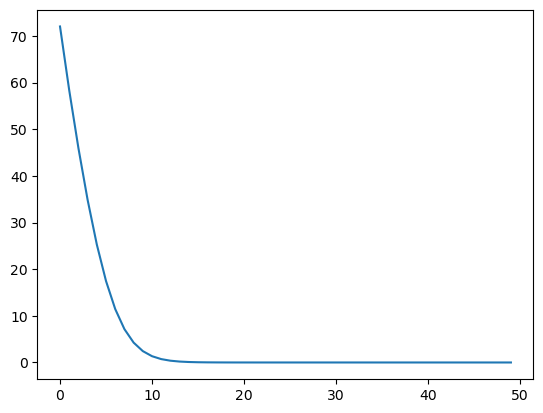

In [47]:
import matplotlib.pyplot as plt

loss_history_cpu = [l.detach().cpu().numpy() for l in loss_history]

plt.plot(loss_history_cpu)